In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

100100111100


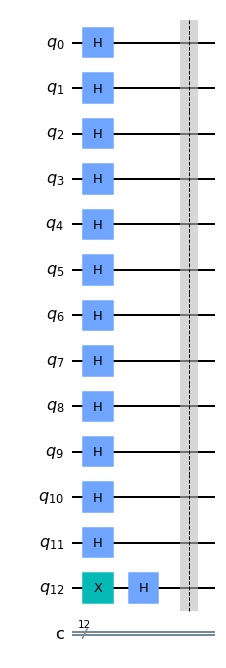

In [2]:
#Algorithm modified to take any string of 1,0 of any length
a= 2364
secretnumber=bin(a).replace("0b", "")
print(secretnumber)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()
circuit.draw(output="mpl")

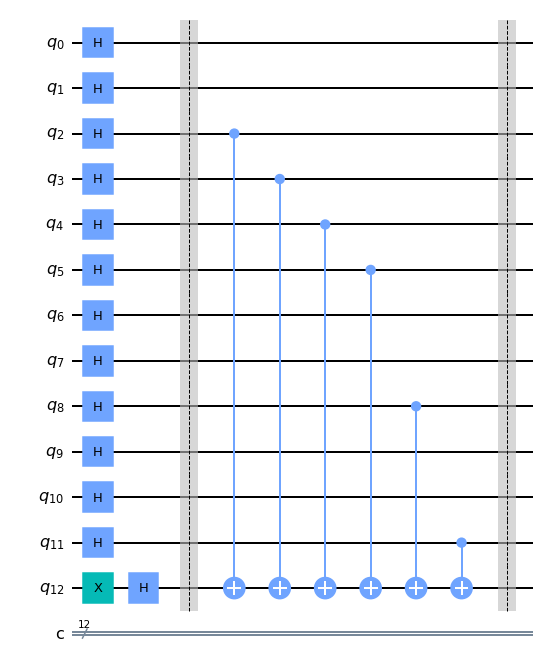

In [3]:
for  i,j in enumerate(reversed(secretnumber)):
    if j == '1':
        circuit.cx(i,len(secretnumber))
circuit.barrier()
circuit.draw(output="mpl")

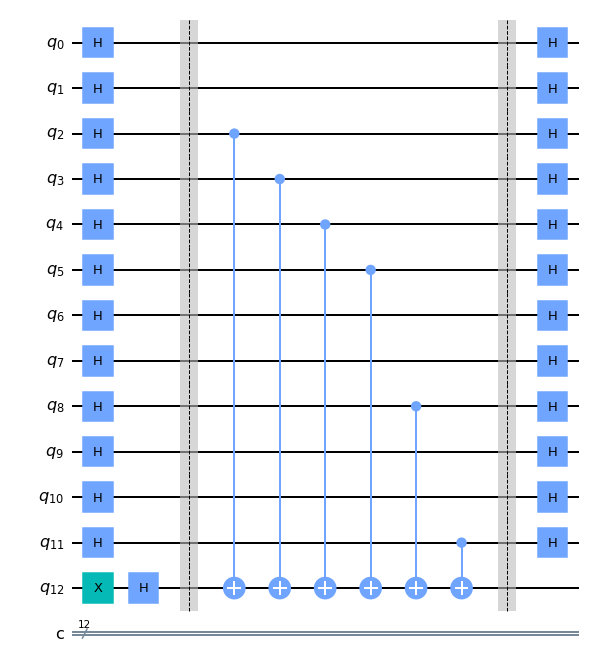

In [4]:
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.draw(output='mpl')

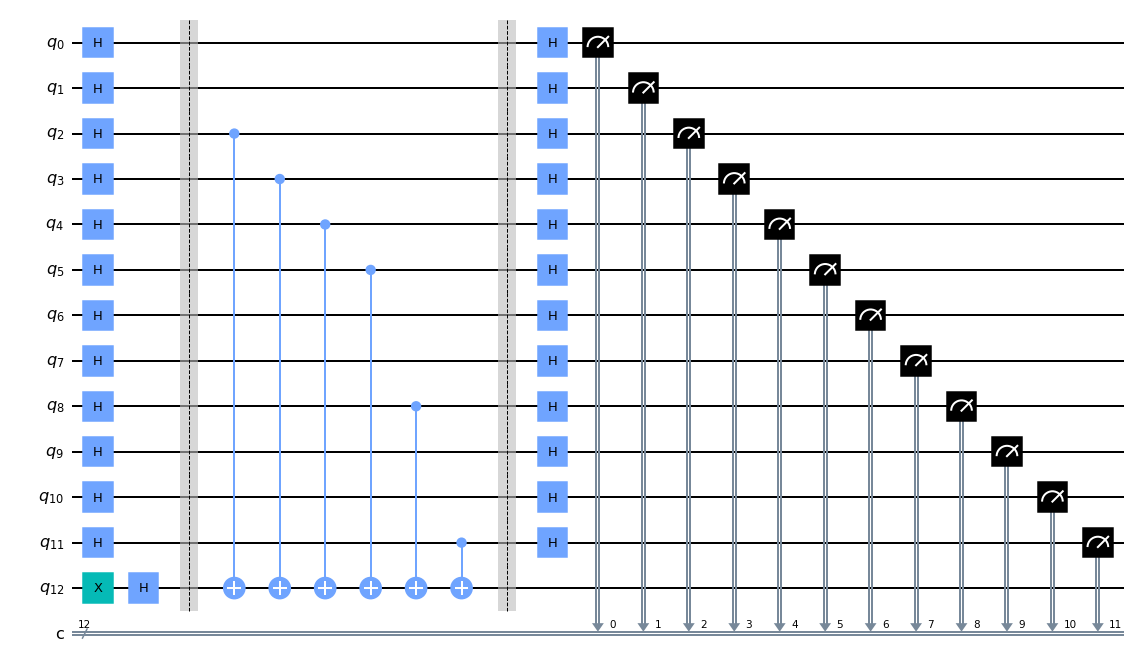

In [5]:
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.draw(output="mpl")

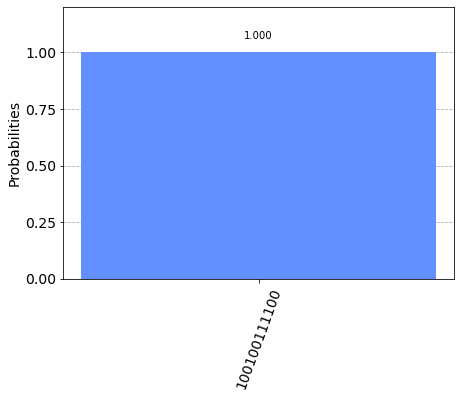

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result= execute(circuit, simulator, shots= 1).result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [8]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [9]:
backend = provider.get_backend('ibmq_16_melbourne')
result = execute(circuit, backend, shots=2048).result()
counts = result.get_counts()
print(counts)

QiskitBackendNotFoundError: 'No backend matches the criteria'